# Case Study on ANOVA

XYZ Company has offices in four different zones. The company wishes to investigate the following :
    
* The mean sales generated by each zone.
* Total sales generated by all the zones for each month.
* Check whether all the zones generate the same amount of sales.

Help the company to carry out their study with the help of data provided.

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [3]:
sd=pd.read_csv('Sales_data_zone_wise.csv')
sd.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [4]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [65]:
sd.isna().any()

Month       False
Zone - A    False
Zone - B    False
Zone - C    False
Zone - D    False
dtype: bool

**Observations:**
* Data set have 29 entries, which is the sales of 29 months.
* There is no null values
* 5 features, 4 of the is integer datatype and the rest one is object datatype.
* Features include sales of 4 different Zones A,B,C,D.

# The mean sales generated by each zone.

In [128]:
mn=sd.mean(axis=0).round(2).to_frame()
mn.columns=['Mean sales']
mn

,Mean sales
Zone - A,1540493.14
Zone - B,1755559.59
Zone - C,1772871.03
Zone - D,1842926.76


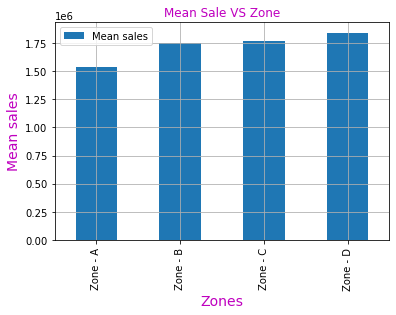

In [137]:
mn.plot.bar()
plt.title('Mean Sale VS Zone',c='m')
plt.xlabel('Zones',c='m',fontsize=14)
plt.ylabel('Mean sales',c='m',fontsize=14)
plt.grid()

**Insights:**
* Zone D has the highest mean sale.
* Lowest mean sale value for Zone B.
* Order: D > C> B> A

# Total sales generated by all the zones for each month

In [110]:
tot=sd.sum(axis=1).to_frame()
tot.rename(columns={0: 'Total_Sales'}, inplace=True)
tot['Month'] = sd['Month']
tot.head()

,Total_Sales,Month
0,7022544,Month - 1
1,7152303,Month - 2
2,6475939,Month - 3
3,8174449,Month - 4
4,5995328,Month - 5


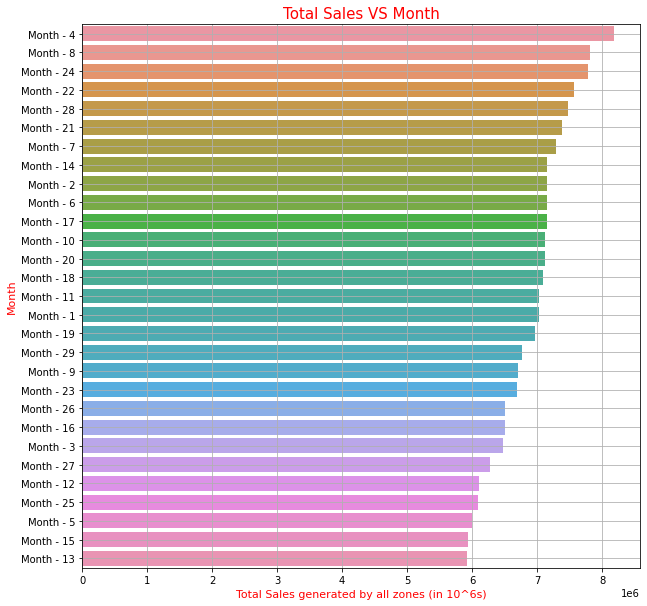

In [95]:
plt.figure(figsize=(10,10))
sns.barplot(y='Month', 
            x="Total_Sales", 
            data=tot, 
            order=tot.sort_values('Total_Sales',ascending = False).Month)
plt.title('Total Sales VS Month',c='r',fontsize=15)
plt.ylabel('Month',c='r',fontsize=11,rotation=90)
plt.xlabel('Total Sales generated by all zones (in 10^6s)',c='r',fontsize=11)
plt.grid()
plt.show()

**Insights:**
* Month 4 has the greatest sale when compared to other other months.
* Month 13 has the least sales.

# Check whether all the zones generate the same amount of sales.

* Here in this dataset, we have more than one independant variables to analyse and compare so we can go with ANOVA test.
* Here we are dealing with only one factor sales, so One Way ANOVA.

**Null Hypothesis, H0**: All the zone generate the same amount of sales

**Alternate Hypothesis, Ha**: All the zone generate different amount of sales

Level Of Significane: 0.05

In [107]:
s,p=f_oneway(sd['Zone - A'],sd['Zone - B'],sd['Zone - C'],sd['Zone - D'])
print('F test statistic:%0.3f'%s,'p-value:',round(p,4))

F test statistic:5.672 p-value: 0.0012


**Result:**
* P-Value (0.0012) < 0.05,  which shows that we can reject the null hypothesis and supports the alternative hypothesis.
* We can say that, **all the zone generate different amount of sales.**

##### Jibin K Joy, DSA Norka Batch 3